<a href="https://colab.research.google.com/github/ethantlogan/FWE_458/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the tools I need and the data
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
# Download the data
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

('air.mon.mean.nc', <http.client.HTTPMessage at 0x7f1bcc582190>)

In [2]:
#Open the dataset and assign it a name
ds = xr.open_dataset(savename)
ds

<xarray.Dataset> Size: 960MB
Dimensions:  (lat: 360, lon: 720, time: 926)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Data variables:
    air      (time, lat, lon) float32 960MB ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [52]:
#Convert temperature from K to celsius
ta = ds.air - 273.15


In [53]:
#This assigns the variable time and slices it to select only the years I want
time = ta['time']
ta = ta.sel(time=slice('1990-01-01', '2020-12-31'))
ta

<xarray.DataArray 'air' (time: 372, lat: 360, lon: 720)> Size: 386MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 1990-01-01 1990-02-01 ... 2020-12-01

In [54]:
#This resamples from monthly to yearly values
ta = air.resample(time="YE").mean()

ta

<xarray.DataArray 'air' (time: 78, lat: 360, lon: 720)> Size: 81MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 624B 1948-12-31 1949-12-31 ... 2025-12-31

In [55]:
#Had to reslice after changing the samples from months to years for some reason
time = ta['time']
ta = ta.sel(time=slice('1990-01-01', '2020-12-31'))
ta

<xarray.DataArray 'air' (time: 31, lat: 360, lon: 720)> Size: 32MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 248B 1990-12-31 1991-12-31 ... 2020-12-31

In [13]:
!pip install cartopy
import cartopy.crs as ccrs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.6 MB/s eta 0:00:00


In [145]:
#This assigns mean values to the unweighted temperatures of every year based
#on lat and lon
unweighted_mean1 = ta.mean(dim=['lat', 'lon'])
unweighted_mean1

<xarray.DataArray 'air' (time: 31)> Size: 124B
array([ 8.785168 ,  8.714317 ,  8.3229885,  8.499462 ,  8.627416 ,
        9.096365 ,  8.573146 ,  8.85324  ,  9.191141 ,  8.96312  ,
        8.927566 ,  9.134132 ,  9.238192 ,  9.298107 ,  8.997143 ,
        9.482438 ,  9.320456 ,  9.469764 ,  9.203374 ,  9.148742 ,
        9.518095 ,  9.320801 ,  9.315943 ,  9.309936 ,  9.408289 ,
        9.709817 ,  9.979748 ,  9.752737 ,  9.447476 ,  9.871853 ,
       10.047581 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 248B 1990-12-31 1991-12-31 ... 2020-12-31

In [149]:
#This assigns weight values to all of the data points in the dataset to determine
#how much weight each point should get based on how much real area it takes up
weights = np.cos(np.deg2rad(ta.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 360)> Size: 1kB
array([0.00436336, 0.0130896 , 0.02181496, 0.03053854, 0.03925979,
       0.04797817, 0.05669278, 0.06540319, 0.0741085 , 0.08280817,
       0.09150165, 0.10018805, 0.10886693, 0.1175374 , 0.12619892,
       0.13485095, 0.1434926 , 0.15212344, 0.16074257, 0.16934957,
       0.17794356, 0.186524  , 0.19509035, 0.20364174, 0.21217772,
       0.22069745, 0.22920035, 0.23768592, 0.24615327, 0.25460202,
       0.2630312 , 0.27144054, 0.27982906, 0.28819627, 0.29654163,
       0.30486432, 0.31316388, 0.32143947, 0.32969064, 0.33791676,
       0.34611705, 0.3542911 , 0.36243805, 0.3705574 , 0.37864864,
       0.38671094, 0.39474392, 0.4027467 , 0.41071892, 0.41865978,
       0.42656872, 0.4344453 , 0.4422887 , 0.4500985 , 0.45787394,
       0.4656145 , 0.4733197 , 0.48098874, 0.48862126, 0.49621648,
       0.50377405, 0.5112931 , 0.5187732 , 0.52621394, 0.5336145 ,
       0.54097444, 0.54829323, 0.55557024, 0.56280494, 0.5699967 ,
       0.57714516, 0.5842497 , 0.59130967, 0.5983246 , 0.605294  ,
       0.61221725, 0.61909395, 0.62592345, 0.63270533, 0.639439  ,
       0.646124  , 0.65275973, 0.6593458 , 0.66588163, 0.6723668 ,
       0.67880076, 0.685183  , 0.691513  , 0.69779044, 0.7040147 ,
       0.7101854 , 0.716302  , 0.72236395, 0.72837096, 0.7343225 ,
       0.7402181 , 0.7460574 , 0.7518398 , 0.757565  , 0.76323247,
...
       0.7343225 , 0.72837096, 0.72236395, 0.716302  , 0.7101854 ,
       0.7040147 , 0.69779044, 0.691513  , 0.685183  , 0.67880076,
       0.6723668 , 0.66588163, 0.6593458 , 0.65275973, 0.646124  ,
       0.639439  , 0.63270533, 0.62592345, 0.61909395, 0.61221725,
       0.605294  , 0.5983246 , 0.59130967, 0.5842497 , 0.57714516,
       0.5699967 , 0.56280494, 0.55557024, 0.54829323, 0.54097444,
       0.5336145 , 0.52621394, 0.5187732 , 0.5112931 , 0.50377405,
       0.49621648, 0.48862126, 0.48098874, 0.4733197 , 0.4656145 ,
       0.45787394, 0.4500985 , 0.4422887 , 0.4344453 , 0.42656872,
       0.41865978, 0.41071892, 0.4027467 , 0.39474392, 0.38671094,
       0.37864864, 0.3705574 , 0.36243805, 0.3542911 , 0.34611705,
       0.33791676, 0.32969064, 0.32143947, 0.31316388, 0.30486432,
       0.29654163, 0.28819627, 0.27982906, 0.27144054, 0.2630312 ,
       0.25460202, 0.24615327, 0.23768592, 0.22920035, 0.22069745,
       0.21217772, 0.20364174, 0.19509035, 0.186524  , 0.17794356,
       0.16934957, 0.16074257, 0.15212344, 0.1434926 , 0.13485095,
       0.12619892, 0.1175374 , 0.10886693, 0.10018805, 0.09150165,
       0.08280817, 0.0741085 , 0.06540319, 0.05669278, 0.04797817,
       0.03925979, 0.03053854, 0.02181496, 0.0130896 , 0.00436336],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    actual_range:        [ 89.75 -89.75]
    long_name:           Latitude
    units:               degrees_north
    axis:                Y
    standard_name:       latitude
    coordinate_defines:  center

In [148]:
#This then selects those weight values based on area calculated before and
#assigns it to the temperature values they allign with in the dataset
ta_weighted1 = ta.weighted(weights)
ta_weighted1

DataArrayWeighted with weights along dimensions: lat

In [150]:
#This assigns mean values to the weighted temperatures of every year based
#on lat and lon
weighted_mean1 = ta_weighted1.mean(("lon", "lat"))
weighted_mean1

<xarray.DataArray 'air' (time: 31)> Size: 124B
array([13.697498 , 13.599258 , 13.2965555, 13.387334 , 13.553697 ,
       13.881936 , 13.459134 , 13.723903 , 14.119165 , 13.868245 ,
       13.762989 , 13.99239  , 14.097365 , 14.098114 , 13.9352455,
       14.241234 , 14.1248045, 14.235225 , 13.99547  , 14.044801 ,
       14.315596 , 14.050535 , 14.110148 , 14.172053 , 14.246574 ,
       14.564974 , 14.697567 , 14.546633 , 14.327436 , 14.662353 ,
       14.761176 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 248B 1990-12-31 1991-12-31 ... 2020-12-31

In [60]:
#Import more tools
import matplotlib.pyplot as plt
from scipy.stats import linregress

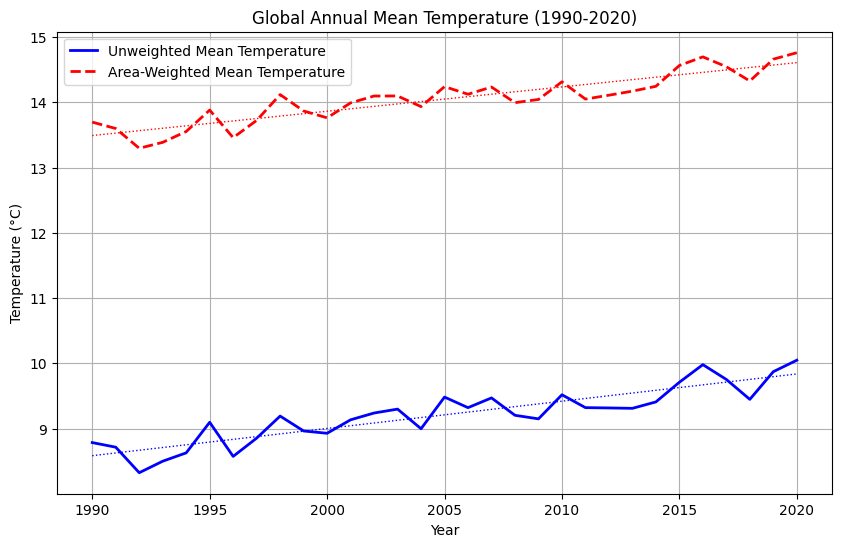

In [151]:
#Give the graph a years value so it knows how long to go for on the x axis
years = ta.time.dt.year.values
#Assign new names to the lists of values of mean temperature
unweighted_temp = unweighted_mean1
area_weighted_temp = weighted_mean1

#Perform linear regression using numpy.polyfit
#polyfit returns the coefficients for the best-fit polynomial (slope and intercept for linear)
slope_unweighted, intercept_unweighted = np.polyfit(years, unweighted_temp, 1)
slope_weighted, intercept_weighted = np.polyfit(years, area_weighted_temp, 1)

#I then create the trend lines using the polynomial coefficients of slope and
#intercept
trend_line_unweighted = slope_unweighted * years + intercept_unweighted
trend_line_weighted = slope_weighted * years + intercept_weighted

#Then I plot the time series with the trend lines and change how each look so
#we can disitinguish one from another
#This also creates the figure for the plots to be in
plt.figure(figsize=(10, 6))
plt.plot(years, unweighted_temp, label='Unweighted Mean Temperature', color='blue', linestyle='-', linewidth=2)
plt.plot(years, area_weighted_temp, label='Area-Weighted Mean Temperature', color='red', linestyle='--', linewidth=2)

#I then plot the trend lines also with different styles to distinguish
plt.plot(years, trend_line_unweighted, color='blue', linestyle=':', linewidth=1)
plt.plot(years, trend_line_weighted, color='red', linestyle=':', linewidth=1)

#Then add labels and a legend to show what I'm graphing
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Global Annual Mean Temperature (1990-2020)')
plt.legend()

#Show the plot
plt.grid(True)
plt.show()

In [194]:
#All the code below until the map I had to recreate the datasets for the
#weighted and unweighted data to make it not be only a single value and let
#the graphing functions work with lat and lon. If I used the datasets before
#for weighted and unweighted, they were already given values based on lat and
#lon so I couldn't graph it based on time becuase it would be a single mean
#value.
unweighted_mean = ta.mean
unweighted_mean

<xarray.DataArray 'air' (lat: 360, lon: 720)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8

In [175]:
ta_weighted = ta.weighted(weights)
ta_weighted


DataArrayWeighted with weights along dimensions: lat

In [187]:
weighted_mean = ta_weighted.mean
weighted_mean

<bound method Weighted.mean of DataArrayWeighted with weights along dimensions: lat>

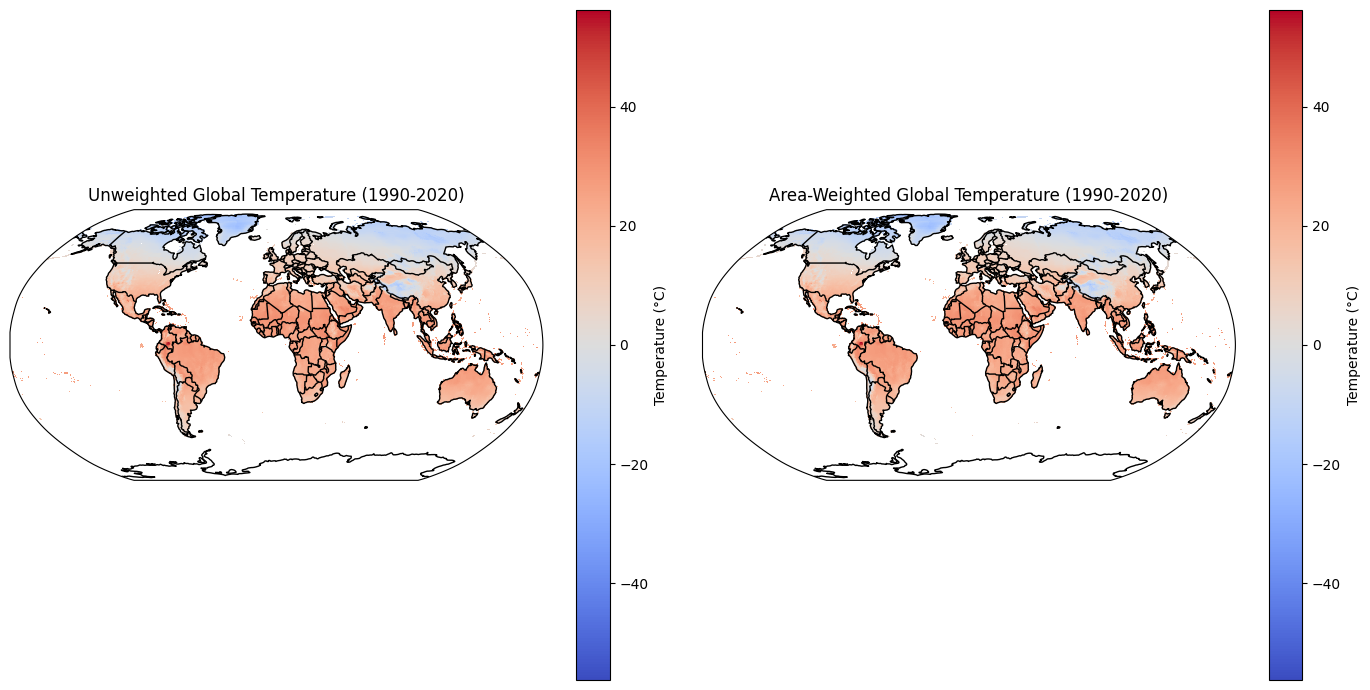

In [192]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#I have to get the 31-year mean (1990-2020) for both weighted and unweighted
#temperatures
unweighted_mean_31yr = unweighted_mean(dim='time')
area_weighted_mean_31yr = weighted_mean(dim='time')

#Set up the figure with two subplots and using the correct projections for the
#globe
fig, axs = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})

# Plot unweighted temperature map and detail the graph
unweighted_mean_31yr.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (°C)'})
axs[0].set_title('Unweighted Global Temperature (1990-2020)')
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS)

# Plot area-weighted temperature map and detail the graph
area_weighted_mean_31yr.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (°C)'})
axs[1].set_title('Area-Weighted Global Temperature (1990-2020)')
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS)

#Show the figure
plt.tight_layout()
plt.show()